# Image classification
- What is image classification ? 
 - Image classification refers to the labeling of images into one of a number of predefined classes.

- Structure of image classification
    - Image preprocessing 
         - The aim of this process is to improve the image data(features) by suppressing unwanted distortions and enhancement of some important image features so that our Computer Vision models can benefit from this improved data to work on.
    - detection of an object
        -  Detection refers to the localization of an object which means the segmentation of the image and identifying the position of the object of interest.
    - feature extraction and fine tuning
        -  This is a crucial step wherein statistical or deep learning methods are used to identify the most interesting patterns of the image, features that might be unique to a particular class and that will, later on, help the model to differentiate between different classes. This process where the model learns the features from the dataset is called model training.
    - classification of the object
        - This step categorizes detected objects into predefined classes by using a suitable classification technique that compares the image patterns with the target patterns.


In [2]:
# Importing libraries

In [12]:
#libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K 

#imagedatagenerator - augment data your images
#sequential - it is a model which allows you to build the model layer by layer.

#convo 2d - it is a cnn kernel, produces tensors of outputs by winding input input layers

# maxpooling - pooling operation that calculates the max value in each patch of the feature map

#activation - defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

#dropout- The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 

#flatten - reshapes the tensor to have the shape that is equal to the number of elements contained in tensor non including the batch dimension.

#dense - it is the regular deeply connected neural network layer.Dense layer does the below operation on the input and return the output.

#backend - runs the computation graph that we have created in the code, taking input from the first parameter and extracting the number of outputs as per the layers mentioned in the second parameter.

In [6]:
#dimensions of our image
img_width , img_height = 180, 180
batch_size = 30
epochs = 50

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

train_samp = 692
validation_samp = 199

if K.image_data_format() == 'channels_first': #image data format returns the default image data format convention
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    

#base model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#augmentation configuration we will use for training
train_data = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#augmentation configuration we will use for testing:
# only rescaling
test_data = ImageDataGenerator(rescale=1. / 255)

train_generator = train_data.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_data.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

model.fit_generator(
    train_generator,
    steps_per_epoch=train_samp // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samp // batch_size)

model.save_weights('first_try.h5') #saving weights



Found 693 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


C:\Users\Zoe\anaconda3\envs\deeplearning\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
23/23 [==============================] - 32s 1s/step - loss: 0.7582 - accuracy: 0.5309 - val_loss: 0.8843 - val_accuracy: 0.5000
Epoch 2/50
23/23 [==============================] - 26s 1s/step - loss: 0.6846 - accuracy: 0.5716 - val_loss: 0.6731 - val_accuracy: 0.6222
Epoch 3/50
23/23 [==============================] - 28s 1s/step - loss: 0.6515 - accuracy: 0.6184 - val_loss: 0.6759 - val_accuracy: 0.5278
Epoch 4/50
23/23 [==============================] - 30s 1s/step - loss: 0.6460 - accuracy: 0.6335 - val_loss: 0.6105 - val_accuracy: 0.6889
Epoch 5/50
23/23 [==============================] - 38s 2s/step - loss: 0.6176 - accuracy: 0.6516 - val_loss: 0.6067 - val_accuracy: 0.6167
Epoch 6/50
23/23 [==============================] - 27s 1s/step - loss: 0.6025 - accuracy: 0.6938 - val_loss: 0.5745 - val_accuracy: 0.7000
Epoch 7/50
23/23 [==============================] - 28s 1s/step - loss: 0.6247 - accuracy: 0.7044 - val_loss: 0.5945 - val_accuracy: 0.6111
Epoch 8/50
23/23 [==

In [38]:
#almost 80 % accuracy
import cv2
import matplotlib.pyplot as plt

In [43]:
def model_test(img_path):
    img_ = cv2.imread(img_path)
    
    plt.figure(figsize = (5, 5))
    plt.imshow(img_)
    
    
    image_size = 180, 180
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = predictions[0]
    print(
        "This image is %.2f percent alien and %.2f percent predator."
        % (100 * (1 - score), 100 * score)
    )

This image is 0.00 percent alien and 100.00 percent predator.


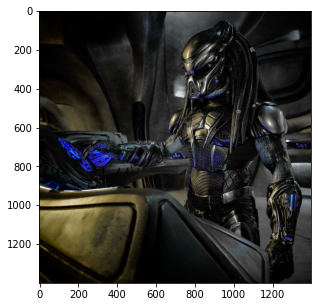

In [44]:
model_test('data/predator_test.jpg')

This image is 100.00 percent alien and 0.00 percent predator.


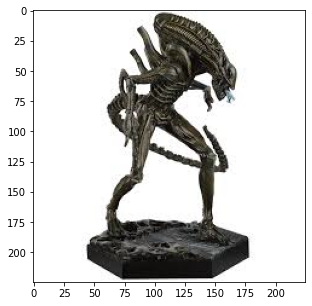

In [46]:
model_test('data/validation/alien/10.jpg')

This image is 0.00 percent alien and 100.00 percent predator.


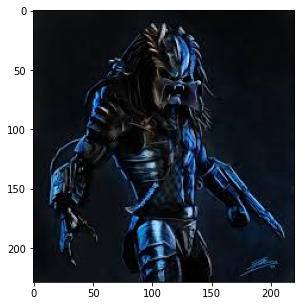

In [47]:
model_test('data/train/predator/30.jpg')

Model can be easily identify, which is alien or which predator. 


Thank you!